# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(5)

,survived,surname,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [ ]:
# calculates descriptive statistics such as count, mean, standard deviation, minimum value, and maximum value

survived_statistics = titanic['survived'].describe()
print(survived_statistics)


survived_count = titanic['survived'].value_counts()[1]
print('Number of survivors:', survived_count)

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64
Number of survivors: 500


Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

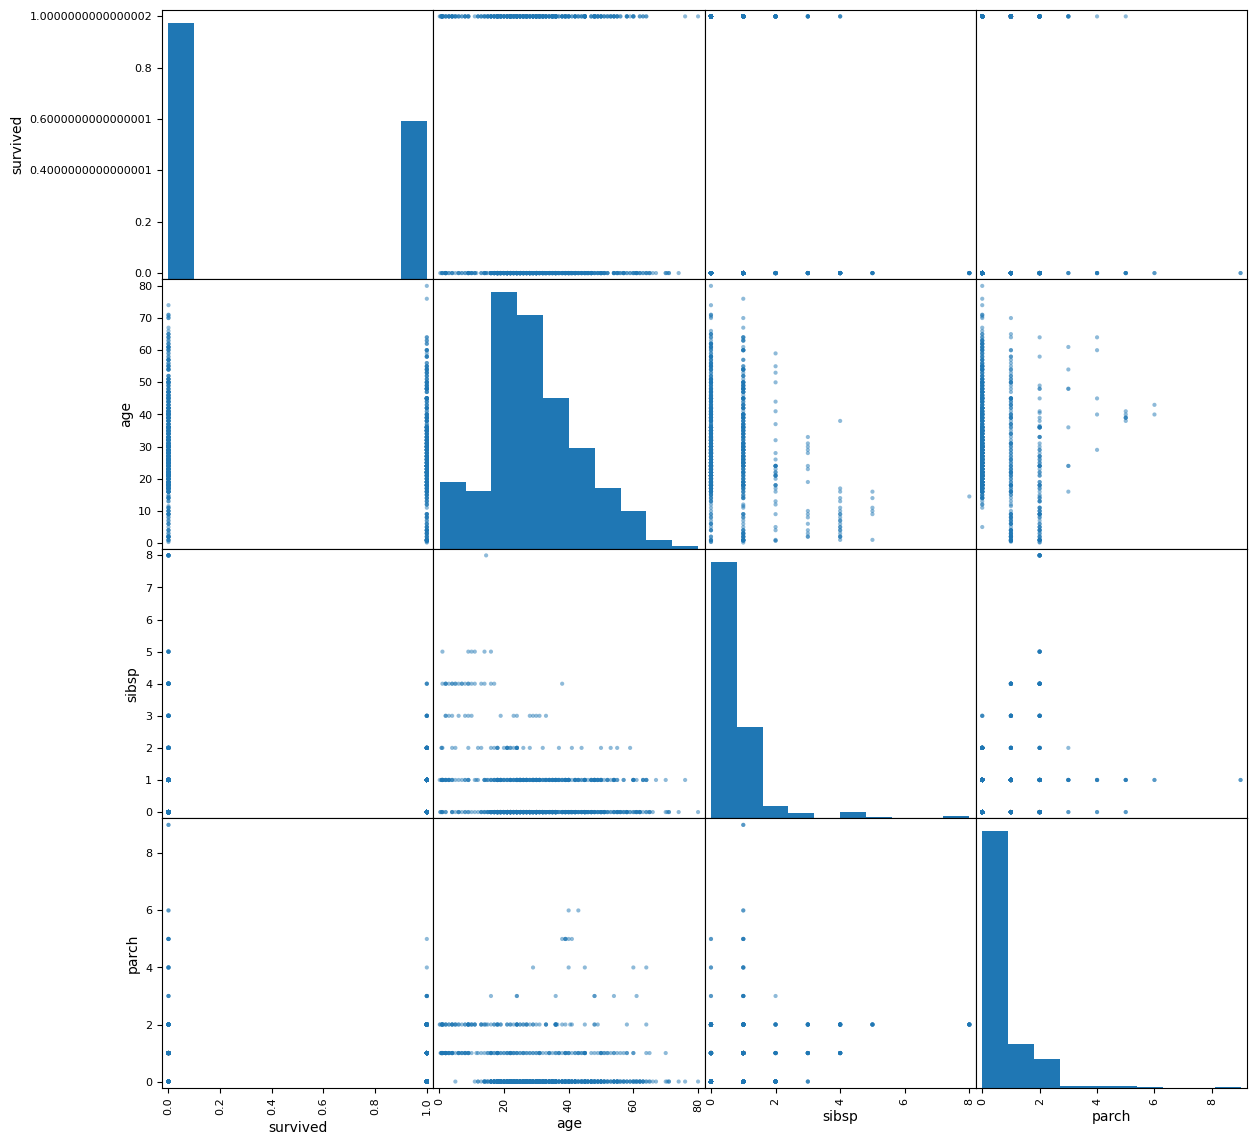

In [ ]:
# titanic.drop(['name', 'ticket','surname'], axis=1, inplace=True)
# titanic.dtypes
# titanic['embarked'].unique()
# titanic['sex'].unique()


# titanic["embarked"] = pd.Categorical(titanic["embarked"])
# titanic.fillna(titanic.mean(), inplace=True)
# titanic["embarked"] = titanic["embarked"].cat.codes

# titanic['sex'] = pd.get_dummies(titanic['sex'])['male']

# #sns.pairplot(titanic, hue='survived')
# pd.plotting.scatter_matrix(titanic, figsize=(15, 15), alpha=0.5, diagonal='hist')



columns = ["survived", "age", "sibsp", "parch", "embarked"]  

pd.plotting.scatter_matrix(titanic[columns], figsize=(14, 14))
plt.show()


Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [ ]:
titanic = pd.read_csv("data/titanic.csv")

titanic["cabin"].fillna(titanic["cabin"].mode()[0],inplace=True)
titanic["age"].fillna(titanic["age"].mean(),inplace=True)

sex=pd.get_dummies(titanic["sex"])
cabin=pd.get_dummies(titanic["cabin"])


data = titanic[["age","sibsp","parch","embarked"]]
data = pd.get_dummies(data, columns=['embarked'])

data = pd.concat([data,sex],axis=1)
data = pd.concat([data,cabin],axis=1)
data = pd.concat([data,titanic["survived"]],axis=1)
data.head()

,age,sibsp,parch,embarked_C,embarked_Q,embarked_S,female,male,A10,A11,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,survived
0,29.0000,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.9167,1,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0000,1,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0000,1,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0000,1,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1) #stratify=y

# print(y_train.value_counts()[1])
# print(y_test.value_counts()[1])

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(["survived"],axis=1)
y=data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


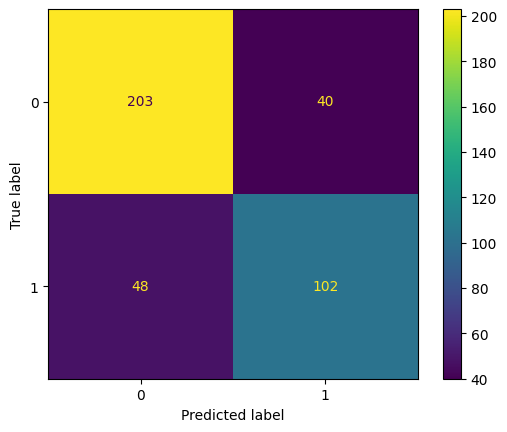

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

cmatrix = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(cmatrix)
disp.plot()
plt.show()

#Tn=203  Fp=40 
#Fn=48   Tp=102

# Model je zadovoljavajuć jer su vrijednosti  Tn i Tp veće od sume Fp i Fn
# Velika je vrijednost Fn - za koje je model predvidio da nisu živi, a preživjeli su

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

y_true = y_test
y_pred = model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred)


print("CAC: {0}".format(accuracy_score(y_test, model.predict(X_test))))

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

CAC: 0.7760814249363868
Precision: [0.80876494 0.71830986]
Recall: [0.83539095 0.68      ]
F1-score: [0.82186235 0.69863014]


__________________________________________________
Dobro je klasificirao 77% primjeraka.

Točnost za preživjele je 0.71.

Stopa stvarno pozitivnih predviđanja (engl. true positive rate) je 0.68 za one koji su preživjeli.

F1 predstavlja harmonijsku sredinu odziva i preciznosti.
______________________________________________________

Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

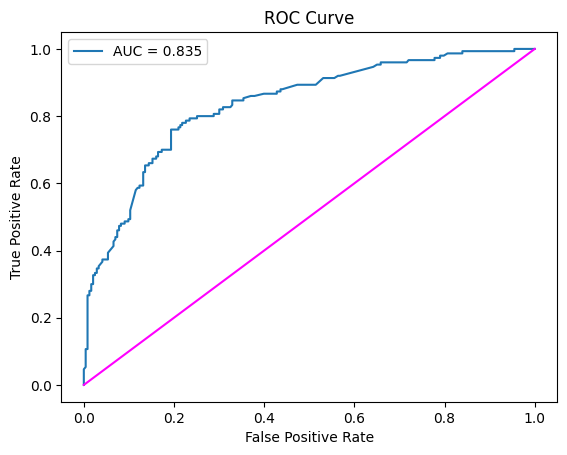

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='-', color='magenta')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

___________________________________________________________
Krivuljom operativnih karakteristika (engl. receiver operator characteristic, ROC) koja pruža grafički prikaz ovisnosti TPR o FPR za različite postavke praga diskriminacije između klasa unutar klasifikatora.

Tp u svim pozitivnim (Tp i Fn) i Fp u svim negativnim (Fp i Tn).
____________________________________________________________

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8198689956331878
Test accuracy: 0.7735368956743003
Train precision: 0.7548209366391184
Test precision: 0.7226277372262774
Train recall: 0.7828571428571428
Test recall: 0.66
Train F1: 0.7685834502103787
Test F1: 0.6898954703832753


_________________________________________________________
**SVM s linearnom jezgrom**

Točnost je bolja na skupu za treniranje (0.82) nego li je na testnom skupu (0.77) što je u većini slučajeva normalno.
________________________________________________________



In [ ]:
# from sklearn.metrics import precision_recall_fscore_support

# y_true = list(y['survived'])
# y_pred = y_predicted

# precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='micro')

# #'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.
# # print the results

# print("Micro-averaged Precision:", precision)
# print("Micro-averaged Recall:", recall)
# print("Micro-averaged F1-score:", f1_score)

Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt

# #oblici transformacije preko parametra kernel u klasi SVC = Najpoznatije transformacije (kod algoritma SVM ove transformacije još se zovu jezgre) jesu polinomijalna, sigmoid te radijalna funkcija

# kernels = ['poly', 'rbf']


# for kernel in kernels:

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     model = SVC(kernel=kernel)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred)
#     rec = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     print(f'Evaluation metrics for {kernel} kernel:')
#     print(f'Accuracy: {acc}')
#     print(f'Precision: {prec}')
#     print(f'Recall: {rec}')
#     print(f'F1-score: {f1}')


In [ ]:
svm = SVC(kernel="poly", degree=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6609360076408787
Test accuracy: 0.5763358778625954
Train precision: 0.9354838709677419
Test precision: 0.8181818181818182
Train recall: 0.07591623036649214
Test recall: 0.07627118644067797
Train F1: 0.14043583535108958
Test F1: 0.13953488372093023


In [ ]:
svm = SVC(kernel="poly", degree=3)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6800382043935053
Test accuracy: 0.6106870229007634
Train precision: 0.8615384615384616
Test precision: 0.8333333333333334
Train recall: 0.14659685863874344
Test recall: 0.1694915254237288
Train F1: 0.2505592841163311
Test F1: 0.2816901408450704


_______________________________________________
Bolji je za sada poly sa stupnjem 2., ali linearni je najbolji.
______________________________________________

In [ ]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6542502387774594
Test accuracy: 0.5610687022900763
Train precision: 0.6851851851851852
Test precision: 0.6153846153846154
Train recall: 0.0968586387434555
Test recall: 0.06779661016949153
Train F1: 0.16972477064220187
Test F1: 0.12213740458015265


In [ ]:
svm = SVC(kernel="rbf", C=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.7402101241642789
Test accuracy: 0.6793893129770993
Train precision: 0.8197674418604651
Test precision: 0.925
Train recall: 0.36910994764397903
Test recall: 0.3135593220338983
Train F1: 0.5090252707581228
Test F1: 0.4683544303797468


In [ ]:
svm = SVC(kernel="rbf", C=4)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.7984718242597899
Test accuracy: 0.767175572519084
Train precision: 0.7255936675461742
Test precision: 0.7878787878787878
Train recall: 0.7198952879581152
Test recall: 0.6610169491525424
Train F1: 0.7227332457293035
Test F1: 0.7188940092165897


_______________________________________________________
Od svih gore isprobanih kombinacija najumjereniji je s radijalnom funkcijom svm = SVC(kernel="rbf", C=4) 
______________________________________________________

Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier()
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8213944603629417
Test accuracy: 0.7251908396946565
Train precision: 0.7945619335347432
Test precision: 0.7875
Train recall: 0.6884816753926701
Test recall: 0.5338983050847458
Train F1: 0.7377279102384292
Test F1: 0.6363636363636364


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier(n_neighbors=3)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8538681948424068
Test accuracy: 0.7519083969465649
Train precision: 0.8417910447761194
Test precision: 0.797752808988764
Train recall: 0.7382198952879581
Test recall: 0.6016949152542372
Train F1: 0.7866108786610879
Test F1: 0.6859903381642511


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier(n_neighbors=10)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.7975167144221585
Test accuracy: 0.6946564885496184
Train precision: 0.8125
Test precision: 0.8275862068965517
Train recall: 0.5785340314136126
Test recall: 0.4067796610169492
Train F1: 0.6758409785932723
Test F1: 0.5454545454545454


_______________________________________________________
Najbolje je klasificirao podatke kada je broj susjeda 3, zatim s defaultnih 5 susjeda, pa najlošije s 10.
_______________________________________________________

Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

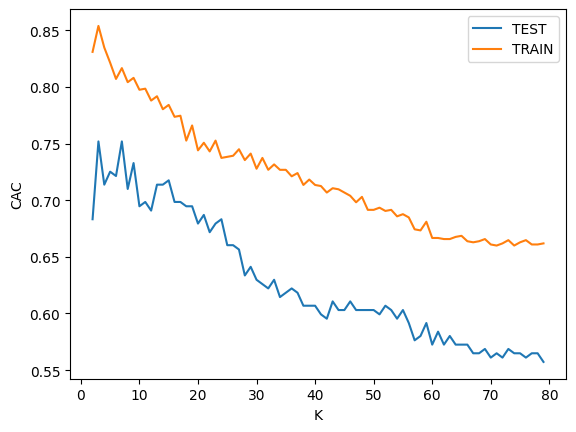

In [ ]:

K = range(2,80)
cac_test = []
cac_train = []

for k in K:
    knm = KNeighborsClassifier(n_neighbors=k)
    knm.fit(X_train, y_train)
    y_train_pred = knm.predict(X_train)
    y_test_pred = knm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(K,cac_test,label="Test")
plt.plot(K,cac_train,label="Train")
plt.xlabel("k")
plt.ylabel("CAC")
plt.legend()
plt.show()

______________________________________________________
Proporcionalno opada vrijednost mjere CAC s veličinom susjedstva ( k ) i za trening i test podskupove.

I može se uočiti da se za  3 susjeda dobije najbolja vrijednost kao što je gore dobiveno izračunom.
______________________________________________________

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=2)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.792741165234002
Test accuracy: 0.7557251908396947
Train precision: 0.7037037037037037
Test precision: 0.7596153846153846
Train recall: 0.7460732984293194
Test recall: 0.6694915254237288
Train F1: 0.724269377382465
Test F1: 0.7117117117117118


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=5)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8261700095510984
Test accuracy: 0.7709923664122137
Train precision: 0.7777777777777778
Test precision: 0.8020833333333334
Train recall: 0.7329842931937173
Test recall: 0.652542372881356
Train F1: 0.7547169811320754
Test F1: 0.719626168224299


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=7)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8433619866284623
Test accuracy: 0.7786259541984732
Train precision: 0.7838541666666666
Test precision: 0.8061224489795918
Train recall: 0.7879581151832461
Test recall: 0.6694915254237288
Train F1: 0.7859007832898172
Test F1: 0.7314814814814814


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=15)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.9073543457497613
Test accuracy: 0.7290076335877863
Train precision: 0.9331306990881459
Test precision: 0.7901234567901234
Train recall: 0.8036649214659686
Test recall: 0.5423728813559322
Train F1: 0.8635724331926864
Test F1: 0.6432160804020101


_____________________________________________________
Vrijednosti za dubinu stabla 5 je najoptimalnije jer za vrijednost 7 nije došlo do značajnog poboljšanja, a za vrijednost dubine 15 je lagano krenula prenaučenost.
_____________________________________________________

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

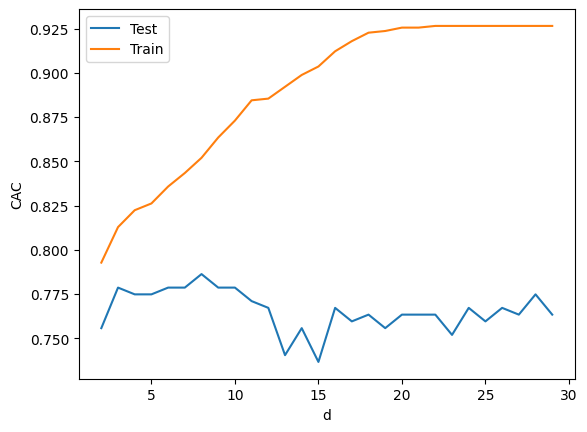

In [ ]:
D = range(2,30)
cac_test = []
cac_train = []

for d in D:
    dtm = DecisionTreeClassifier(max_depth=d)
    dtm.fit(X_train, y_train)

    y_train_pred = dtm.predict(X_train)
    y_test_pred = dtm.predict(X_test)
  
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(D,cac_test,label="Test")
plt.plot(D,cac_train,label="Train")
plt.xlabel("d")
plt.ylabel("CAC")
plt.legend()
plt.show()

__________________________________________________________
Prema grafu dubina 7 je najbolja i za trening i testni skup. Prenaučen je model od dubine 17 pa nadalje.
___________________________________________________________